### Step 1: download pregenerated dataset from iNaturalist as follows:

1. Go to iNaturalist.org and sign into your account.
2. Go to observations > export and create a Query with the following criteria in the following fields:

    Filter: quality grade Research
    
    Place: DMV, US
    
    Taxon: Apis mellifera
    
3. Create export

### Step 2: import necessary packages and functions

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

### Step 3: unzip and upload dataset to project folder

Import dataset

In [2]:
iNat_monitor = pd.read_csv('observations-71449.csv', header=0, parse_dates=True, squeeze=True)

In [3]:
# check first rows
iNat_monitor.head()

,id,observed_on_string,observed_on,time_observed_at,time_zone,out_of_range,user_id,user_login,created_at,updated_at,...,geoprivacy,taxon_geoprivacy,coordinates_obscured,positioning_method,positioning_device,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,330317,4/26/2013 12:10,4/26/2013,2013-04-26 16:10:28 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:32:49 UTC,2017-11-09 19:02:58 UTC,...,NaN,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219
1,330329,4/25/2013 17:25,4/25/2013,2013-04-25 21:25:16 UTC,Eastern Time (US & Canada),NaN,14389,sdroege,2013-07-12 19:38:12 UTC,2017-11-09 19:03:00 UTC,...,NaN,NaN,False,NaN,NaN,Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219
2,534926,9/22/2012 10:16,9/22/2012,2012-09-22 14:16:01 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-02-18 04:55:08 UTC,2017-11-09 19:24:06 UTC,...,NaN,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219
3,548320,6/11/2013 6:20,6/11/2013,2013-06-11 10:20:18 UTC,Eastern Time (US & Canada),NaN,30601,calopteryx,2014-03-02 04:21:14 UTC,2017-11-09 19:26:51 UTC,...,NaN,NaN,False,NaN,NaN,Apis mellifera,Apis mellifera,Western Honey Bee,Insecta,47219
4,775199,7/8/2014 18:00,7/8/2014,2014-07-08 22:00:00 UTC,Eastern Time (US & Canada),NaN,31092,ecologyelise,2014-07-08 22:25:03 UTC,2018-12-12 06:28:44 UTC,...,obscured,NaN,True,NaN,NaN,Western Honey Bee,Apis mellifera,Western Honey Bee,Insecta,47219


### Step 4: Create season variable 

In [4]:
# Convert pandas series to dataframe and observed_on to datetime64
df_iNat = pd.DataFrame({'observed_on':iNat_monitor.observed_on, 'user_id':iNat_monitor.user_id})
df_iNat["observed_on"] = df_iNat["observed_on"].astype("datetime64")

# Observation count variable
df_iNat['count'] = 1

print(df_iNat.head())

  observed_on  user_id  count
0  2013-04-26    14389      1
1  2013-04-25    14389      1
2  2012-09-22    30601      1
3  2013-06-11    30601      1
4  2014-07-08    31092      1


In [5]:
# Convert observed_on to string
df_iNat['observed_on'] = df_iNat.observed_on.astype(str)

In [ ]:
# Separate month from the observed date into an integer column
df_iNat['month'] = df_iNat.observed_on.str.slice(start=5, stop=7).astype(int)

In [44]:
# Function to make season number   
def make_season_num(month):
    """take month number as input and return corresponding season number
    1 = months 12-2 (corresponding to winter), 
    2 = months 3-5 (corresponding to spring), 
    3 = months 6-8 (corresponding to summer),
    4 = months 9-11 (corresponding to fall)
    """    
    
    # Check that month values exist
    assert month >= 1, "implausible month value"
    assert month <= 12, "implausible month value"
    
    # Transcribe month to season number
    season_num = (month % 12 + 3) // 3
    return season_num

In [45]:
# Function to make season string   
def make_season(season_num):
    """take season number as input and return corresponding season spring to use as labels in the graphs
    winter = seson_num 1, 
    spring = seson_num 2, 
    summer = seson_num 3,
    fall = seson_num 4
    """    
    
    # Check that season number values exist
    assert season_num >= 1, "implausible season number"
    assert season_num <= 4, "implausible season number"
    
    # Transcribe season number to actual name
    if season_num == 1:
        season = 'winter'
    elif season_num == 2: 
        season = 'spring'
    elif season_num ==3:
        season = 'summer'
    else:
        season = 'fall'
    return season

In [46]:
# Apply season functions
df_iNat['season_num'] = df_iNat.month.apply(make_season_num)
df_iNat['season'] = df_iNat.season_num.apply(make_season)

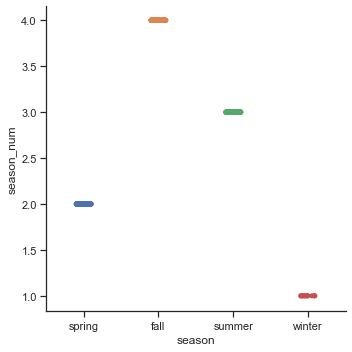

In [48]:
# check that seasons correspond to the right season number
sns.catplot(x="season", y="season_num", data=df_iNat)

In [49]:
# Get a variable for year
df_iNat['year'] = df_iNat.observed_on.str.slice(0,4)

# Check dataframe format
print(df_iNat.head())

  observed_on  user_id  count  month season_month  season  season_num  year
0  2013-04-26    14389      1      4       spring  spring           2  2013
1  2013-04-25    14389      1      4       spring  spring           2  2013
2  2012-09-22    30601      1      9         fall    fall           4  2012
3  2013-06-11    30601      1      6       summer  summer           3  2013
4  2014-07-08    31092      1      7       summer  summer           3  2014


### Step 5: Adjust number of observations by number of users

In [50]:
# Sum observations (count) by season (using season_month) and year
df_iNat['obs_perseason'] = df_iNat.groupby(['year', 'season_month'])['count'].transform('sum')

# Count of unique values for user_id (number of users) per season, year
df_iNat['user_count'] = df_iNat.groupby(['year', 'season_month'])['user_id'].transform('nunique')

# Check that user count is above zero (and no missings) to avoid division by zero in next cell
assert df_iNat['user_count'].all() > 0
assert df_iNat['user_count'].all() != 'NaN'

In [51]:
# Create variable for adusted observations (observations per number of iNaturalist observers at each time point)
df_iNat['adj_obs'] = (df_iNat['obs_perseason']/df_iNat['user_count'])


### Step 6: manipulate dataframe (prepare for creating graph)

First, keep only unique values (condense into one row per season, year)

In [52]:
iNat_complete = df_iNat.drop_duplicates(subset=['year','season_month'], keep='first')

Then, order by date (observed_on)

In [53]:
# Now that we don't have repeated rows for the same date, we can order by date
iNat_complete = iNat_complete.sort_values(by='observed_on')

Concatenate season and year variables

In [54]:
iNat_complete['season_year'] = iNat_complete['season'] + ', ' + iNat_complete['year']

# Make new index in next step
iNat_complete = iNat_complete.reset_index(drop=True)

Drop columns not needed, rename variables for graph labels

In [55]:
# New dataframe only with columns needed
iNat_complete = pd.DataFrame({'season_year':iNat_complete.season_year, 'obs_perseason':iNat_complete.obs_perseason,'adj_obs':iNat_complete.adj_obs})
iNat_complete = iNat_complete.rename(columns={"season_year":"Date of observation","obs_perseason":"Number of observations","adj_obs":"Observations per user"})

# Check final dataset for graphs
iNat_complete

,Date of observation,Number of observations,Observations per user
0,"summer, 2005",3,3.000000
1,"summer, 2006",1,1.000000
2,"spring, 2010",1,1.000000
3,"fall, 2010",1,1.000000
4,"summer, 2011",1,1.000000
5,"fall, 2011",2,1.000000
6,"spring, 2012",1,1.000000
7,"summer, 2012",1,1.000000
8,"fall, 2012",2,1.000000
9,"spring, 2013",2,2.000000


### Step 7: undadjusted graph

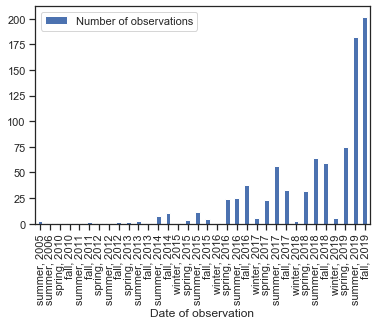

In [56]:
iNat_graph = iNat_complete.plot.bar(x='Date of observation', y='Number of observations', rot=90).get_figure()
# Save figure
iNat_graph.savefig('unadjusted_observations.pdf',dpi=300, bbox_inches = "tight")

This graph shows a sharp increase in observations of honeybees in the DMV area. 
There is a seasonal pattern, where they are observed the most in spring, summer, and fall.
However, this graph, more than showing the presence of honeybees in the area, reflects the increase of iNaturalist users in time.
the project of iNaturalist launched in 2008, with the possibility to enter observations retrospectively, 
hence the presence of a few observations before then.

### Step 8: user-adjusted graph

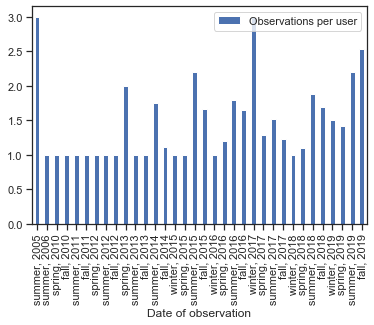

In [57]:
iNat_graph_adjusted = iNat_complete.plot.bar(x='Date of observation', y='Observations per user', rot=90).get_figure()
# Save figure
iNat_graph_adjusted.savefig('adjusted_observations.pdf', dpi=300, bbox_inches = "tight")

This graph shows the number of observations per iNaturalist user. 
It shows peaks of observations on spring, summer, and fall, with the exception of winter 2017, 
when there were 3 observations per iNaturalist user.
In general, this graph does not reflect a decline of observations in time. 
Perhaps in the next few years, with a higherer number of iNaturalists and increased habitat threat 
of pollinators from worsening climate change, we will see a downward trend.